In [477]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-triples.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df['gf_times_batter_vibes'] = df['batter_ground_friction'] * df['batter_vibes']
df['op_times_pitcher_vibes'] = df['pitcher_overpowerment'] * df['pitcher_vibes']

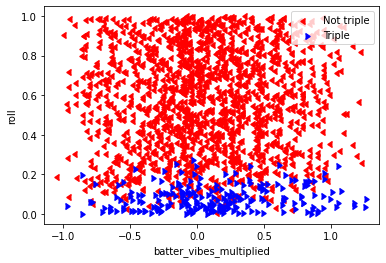

In [431]:
df['flinch'] = (df["batter_mods"].astype(str).str.contains("FLINCH") & (df["strike_count"] == 0)).astype(int)
df["threshold"] = 0.082508 + df["batter_ground_friction"] * 0.2 - df["pitcher_overpowerment"] * 0.045 - df["ballpark_ominousness"] * 0.4 - df["ballpark_viscosity"] * 0.025 - df["ballpark_forwardness"] * 0.025

x_val = "batter_vibes_multiplied"
# x_val = "svc"
fig, ax = plt.subplots(1)
ax.scatter(df[~df['passed']][x_val], df[~df['passed']]["roll"], color="red", label="Not triple", marker=CARETLEFTBASE)
ax.scatter(df[df['passed']][x_val], df[df['passed']]["roll"], color="blue", label="Triple", marker=CARETRIGHTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
# ax.set_xlim(0.48, 0.52)

# min_x, max_x = ax.get_xlim()
# xx = np.linspace(min_x - 0.1, max_x + 0.1)
# yy = xx * 0.35 + 0.35
# ax.plot(xx, yy)

ax.legend()

# fig.savefig(x_val+".png", facecolor='white')
# endpoints = np.array(ax.get_xlim())
# ax.plot(endpoints, 0.35 + 0.35 * endpoints)

225


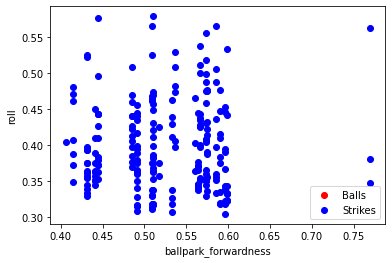

In [419]:
df["offset"] = df["roll"] - df["threshold"]

outliers = df[(df["passed"] & (df["offset"] > 0)) | (~df["passed"] & (df["offset"] < 0))]
print(outliers.shape[0])

fig, ax = plt.subplots(1)
# fig.set_size_inches(10, 10)
x_val = "ballpark_forwardness"
ax.scatter(outliers[~outliers['passed']][x_val], outliers[~outliers['passed']]["offset"], color="red", label="Balls")
ax.scatter(outliers[outliers['passed']][x_val], outliers[outliers['passed']]["offset"], color="blue", label="Strikes")
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.legend()


In [257]:
outliers[['batter_mods', 'batting_team_mods', 'pitcher_mods', 'pitching_team_mods']]

,batter_mods,batting_team_mods,pitcher_mods,pitching_team_mods
1,FLINCH,CARCINIZATION;UNHOLEY;PARTY_TIME,NaN,BIRD_SEED
4,FIRST_BORN,BIRD_SEED,NaN,CARCINIZATION;UNHOLEY;PARTY_TIME
7,SCATTERED,BIRD_SEED,NaN,CARCINIZATION;UNHOLEY;PARTY_TIME
8,NaN,BIRD_SEED,NaN,CARCINIZATION;UNHOLEY;PARTY_TIME
9,NaN,BIRD_SEED,NaN,CARCINIZATION;UNHOLEY;PARTY_TIME
...,...,...,...,...
10990,NaN,PARTY_TIME,NaN,CARCINIZATION;UNHOLEY;PARTY_TIME
10991,NaN,BASE_INSTINCTS,NaN,UNDERSEA;PARTY_TIME
10994,NaN,PARTY_TIME,NaN,CARCINIZATION;UNHOLEY;PARTY_TIME
10996,NaN,UNDERSEA;PARTY_TIME,NaN,BASE_INSTINCTS


In [258]:
df.groupby('pitcher_ruthlessness').head(1)[['pitcher_ruthlessness', 'pitcher_name']].sort_values(
    'pitcher_ruthlessness')


,pitcher_ruthlessness,pitcher_name
2052,0.060292,Flattery McKinley
28,0.104391,Simba Davis
9306,0.109610,Simba Davis
6661,0.131158,Flattery McKinley
1104,0.159708,Persephone Splotter
...,...,...
3750,1.236492,Theodore Cervantes
2036,1.289278,Brock Forbes
3741,1.327721,Gabriel Griffith
3735,1.341412,Burke Gonzales


In [259]:
df.groupby(['batter_name', 'pitcher_name']).size()

batter_name    pitcher_name    
--e- --varado  Beasley Gloom        1
               Bright Zimmerman     8
               Cornelius Games      5
               Inky Rutledge        7
               Logan Rodriguez      5
                                   ..
Ziwa Mueller   Logan Rodriguez      4
               Oscar Vaughan        6
               PolkaDot Zavala      6
               Simba Davis          7
               Winnie Hess         14
Length: 2199, dtype: int64

In [522]:
X = df[['roll', *df.columns[5:-6]]].drop('pitcher_name', axis=1)
# X = df[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness', 'pitcher_vibes']]
# X = df[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = df[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness', 'batter_musclitude', 'pitcher_vibes_multiplied', 'flinch']]
# X = df[['roll', 'batter_buoyancy', 'batter_divinity', 'batter_martyrdom',
#        'batter_moxie', 'batter_musclitude', 'batter_patheticism',
#        'batter_thwackability', 'batter_tragicness',
#        'pitcher_ruthlessness', 'pitcher_overpowerment',
#        'pitcher_unthwackability', 'pitcher_shakespearianism',
#        'pitcher_suppression', 'pitcher_coldness',
#        'defense_avg_anticapitalism', 'defense_avg_chasiness',
#        'defense_avg_omniscience', 'defense_avg_tenaciousness',
#        'defense_avg_watchfulness', 'ballpark_grandiosity',
#        'ballpark_fortification', 'ballpark_obtuseness', 'ballpark_ominousness',
#        'ballpark_inconvenience', 'ballpark_viscosity', 'ballpark_forwardness',
#        'ballpark_mysticism', 'ballpark_elongation', 'batting_team_hype',
#        'pitching_team_hype', 'batter_vibes', 'batter_vibes_multiplied',
#        'pitcher_vibes', 'pitcher_vibes_multiplied', 'gf_times_batter_vibes', 'op_times_pitcher_vibes']]
X = df[['roll', 'batter_ground_friction', 'pitcher_overpowerment', 'defense_avg_chasiness', 'ballpark_ominousness', 'ballpark_viscosity', 'ballpark_forwardness', 'batter_vibes', 'pitcher_vibes', 'gf_times_batter_vibes', 'op_times_pitcher_vibes']]
y = df['passed']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [523]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm

trainedsvm = svm.SVC(kernel='linear').fit(X_train, y_train)
predictionsvm = trainedsvm.predict(X_test)
print(confusion_matrix(y_test,predictionsvm))
print(classification_report(y_test,predictionsvm))


[[301   2]
 [  2  40]]
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       303
        True       0.95      0.95      0.95        42

    accuracy                           0.99       345
   macro avg       0.97      0.97      0.97       345
weighted avg       0.99      0.99      0.99       345



In [524]:
coef = np.true_divide(trainedsvm.coef_,  sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

In [525]:
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(1.0, 'roll'),
 (-0.19579489452296678, 'batter_ground_friction'),
 (0.04738940429110194, 'pitcher_overpowerment'),
 (0.03356409076028361, 'ballpark_viscosity'),
 (0.0282550891228182, 'defense_avg_chasiness'),
 (-0.027077436903053472, 'gf_times_batter_vibes'),
 (0.016529374016850482, 'ballpark_ominousness'),
 (0.016053275555260458, 'pitcher_vibes'),
 (-0.009147948730713557, 'batter_vibes'),
 (0.008843764663985506, 'ballpark_forwardness'),
 (-0.0005249296542151056, 'op_times_pitcher_vibes')]

In [513]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
intercept_scaled

array([-0.08228988])

In [471]:
sc.inverse_transform(trainedsvm.coef_)

array([[-1.45745807,  1.19450962,  0.64186668,  0.60152816,  0.47909738,
         0.44164866,  0.52758105,  0.11451101, -0.11829227,  0.13213446,
        -0.01163847]])

In [268]:
df_strikes = df[df['event_type'] == "StrikeLooking"]

In [269]:
df_strikes[df_strikes.roll == df_strikes.roll.max()]

,Unnamed: 0,event_type,roll,passed,batter_name,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,...,pitcher_vibes_multiplied,game_id,stadium_id,play_count,weather,ball_count,strike_count,flinch,threshold,offset


In [270]:
trainedsvm.score(X, y)

/home/will/.virtualenvs/resim/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.676577559556283

In [271]:
trainedsvm.n_support_

array([176, 177], dtype=int32)

In [272]:
df.columns

Index(['Unnamed: 0', 'event_type', 'roll', 'passed', 'batter_name',
       'batter_buoyancy', 'batter_divinity', 'batter_martyrdom',
       'batter_moxie', 'batter_musclitude', 'batter_patheticism',
       'batter_thwackability', 'batter_tragicness', 'batter_multiplier',
       'batter_mods', 'batting_team_mods', 'pitcher_name',
       'pitcher_ruthlessness', 'pitcher_overpowerment',
       'pitcher_unthwackability', 'pitcher_shakespearianism',
       'pitcher_suppression', 'pitcher_coldness', 'pitcher_multiplier',
       'pitcher_chasiness', 'pitcher_mods', 'pitching_team_mods',
       'defense_avg_anticapitalism', 'defense_avg_chasiness',
       'defense_avg_omniscience', 'defense_avg_tenaciousness',
       'defense_avg_watchfulness', 'ballpark_grandiosity',
       'ballpark_fortification', 'ballpark_obtuseness', 'ballpark_ominousness',
       'ballpark_inconvenience', 'ballpark_viscosity', 'ballpark_forwardness',
       'ballpark_mysticism', 'ballpark_elongation', 'batting_team_hype

In [273]:
coef

array([[ 4.27986214e+01, -2.68688437e-01, -1.49607577e+00,
        -4.01353196e-02,  9.51793639e-02, -1.32897579e+00,
         1.04189671e-01, -1.92006540e+00, -1.33794205e-01,
         4.03407332e-02,  3.22544327e-01, -3.83859187e-02,
         6.04166903e-02, -3.22503841e-01, -3.48124728e-01,
        -9.75927532e-01,  8.42874542e-01,  3.41686623e-01,
         2.50898342e-01,  2.79944145e-01,  6.46563706e-01,
         7.39076523e-01,  4.27936292e+00,  1.18388838e-01,
         7.65695506e-01, -2.23797813e-02, -4.19813414e+00,
         4.02164613e-01,  7.32678328e-01,  0.00000000e+00,
         0.00000000e+00, -5.01999634e-01, -4.16430122e-01,
         4.98979482e-01, -4.27921841e-01]])

In [274]:
coef_scaled

array([[ 1.00000000e+00, -6.27796943e-03, -3.49561674e-02,
        -9.37771318e-04,  2.22388855e-03, -3.10518365e-02,
         2.43441653e-03, -4.48627862e-02, -3.12613352e-03,
         9.42570857e-04,  7.53632516e-03, -8.96896150e-04,
         1.41165038e-03, -7.53537918e-03, -8.13401734e-03,
        -2.28027796e-02,  1.96939648e-02,  7.98358947e-03,
         5.86229963e-03,  6.54096175e-03,  1.51071152e-02,
         1.72686993e-02,  9.99883357e-02,  2.76618345e-03,
         1.78906582e-02, -5.22908931e-04, -9.80904058e-02,
         9.39667213e-03,  1.71192039e-02,  0.00000000e+00,
         0.00000000e+00, -1.17293412e-02, -9.72998916e-03,
         1.16587747e-02, -9.99849592e-03]])

In [275]:
intercept_scaled

array([-0.284439])

In [276]:
df2.groupby('game_id').head(1)[['game_id', 'pitcher_name']].sort_values('game_id')


,game_id,pitcher_name
102,e2e10167-3b18-4934-bd1a-c3629fa3edfc,Rivers Rosa
6343,e5a8e9f1-a065-4552-9333-4772dcb9de69,Rivers Rosa
12856,f42fc7fd-ebf5-450c-94a9-47e0057c1059,Rivers Rosa


In [277]:
n_overlaps = 0
n_pitcher_games = 0
grouped = df.groupby('pitcher_name')
for name, group in grouped:
    print(name)
    grouped2 = group.groupby('game_id')
    for name2, group2 in grouped2:
        n_pitcher_games += 1
        grouped3 = group2.groupby('event_type')
        minroll = 0
        maxroll = 0
        print("    " + name2, len(group2))
        for name3, group3 in grouped3:
            if name3 == "Ball":
                minroll = group3['roll'].min()
                print("        " + name3+":          ", minroll)
            else:
                maxroll = group3['roll'].max()
                print("        " + name3+": ", maxroll)
            if (maxroll > minroll) and maxroll > 0 and minroll > 0:
                print("        OVERLAP!")
                n_overlaps += 1

Adalberto Tosser
    3758cccc-ef21-48c1-88ae-4cd36e7cb16f 42
        BaseHit:  0.9995693210049436
        Foul:  0.3410583402634595
        Out:  0.9550120690305834
    8ab998f5-0b24-4c1d-80e4-53a40777b927 33
        BaseHit:  0.7601046365837976
        Foul:  0.2556333571486111
        Out:  0.941830078823828
    e881128d-3cfc-4311-a7a9-0e6b6dee1f25 47
        BaseHit:  0.9695937129150044
        Foul:  0.3478326885756109
        Out:  0.9664960045527684
Agan Harrison
    3e6fc617-9fbd-4cbf-beb2-1a90fb2f8782 46
        BaseHit:  0.9969472283643072
        Foul:  0.2880820106433102
        Out:  0.9699840725106146
    a65a9171-0052-4c62-831f-aa5ad2f4a7b3 62
        BaseHit:  0.953495786670411
        Foul:  0.3356875941381365
        Out:  0.9868039183944342
Alaynabella Hollywood
    5f76c816-d6a9-4984-94a7-2da44201e85b 53
        BaseHit:  0.9908375076756172
        Foul:  0.289216070236916
        Out:  0.986626796817309
Alejandro Leaf
    61726359-ac29-4150-8997-417cb97a8015 36
    

In [278]:
print(n_overlaps, n_pitcher_games)

0 287


In [278]:
df_strikes = df[df['event_type'] == "StrikeLooking"]

In [14]:
df_strikes[df_strikes.roll == df_strikes.roll.max()]

,Unnamed: 0,event_type,roll,passed,batter_name,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,...,batting_team_hype,pitching_team_hype,batter_vibes,pitcher_vibes,game_id,play_count,svc,svc_vibes,batter_strikeattr,ruth_and_fwd
1102,1102,StrikeLooking,0.843714,True,Lou Roseheart,0.569928,0.405447,1.257243,0.945831,1.291551,...,0,0,0.153553,0.620751,e8421a0a-ee41-4158-8bb0-beb3b391bc95,23,0.632587,0.607026,0.112244,0.911324


In [108]:
trainedsvm.score(X, y)

/Users/robbyblum/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.8231591448931116

In [107]:
trainedsvm.n_support_

array([160, 156], dtype=int32)

In [135]:
coef

array([[-21.58349125,   8.06163977]])

In [136]:
coef_scaled

array([[ 1.        , -0.37350953]])

In [137]:
intercept_scaled

array([-0.30330534])

In [195]:
df2.groupby('game_id').head(1)[['game_id', 'pitcher_name']].sort_values('game_id')


,game_id,pitcher_name
3,e5a8e9f1-a065-4552-9333-4772dcb9de69,Rivers Rosa
5984,f42fc7fd-ebf5-450c-94a9-47e0057c1059,Rivers Rosa


In [230]:
n_overlaps = 0
n_pitcher_games = 0
grouped = df.groupby('pitcher_name')
for name, group in grouped:
    print(name)
    grouped2 = group.groupby('game_id')
    for name2, group2 in grouped2:
        n_pitcher_games += 1
        grouped3 = group2.groupby('event_type')
        minroll = 0
        maxroll = 0
        print("    " + name2, len(group2))
        for name3, group3 in grouped3:
            if name3 == "Ball":
                minroll = group3['roll'].min()
                print("        " + name3+":          ", minroll)
            else:
                maxroll = group3['roll'].max()
                print("        " + name3+": ", maxroll)
            if (maxroll > minroll) and maxroll > 0 and minroll > 0:
                print("        OVERLAP!")
                n_overlaps += 1

Adalberto Tosser
    e881128d-3cfc-4311-a7a9-0e6b6dee1f25 43
        Ball:           0.6041818489215967
        StrikeLooking:  0.6058793168286232
        OVERLAP!
Agan Harrison
    a65a9171-0052-4c62-831f-aa5ad2f4a7b3 75
        Ball:           0.4558967712899426
        StrikeLooking:  0.4135113761960709
Alaynabella Hollywood
    5f76c816-d6a9-4984-94a7-2da44201e85b 77
        Ball:           0.4546766467479894
        StrikeLooking:  0.4123385380630908
Alejandro Leaf
    6f8fa107-23c1-4081-8fb1-678cd3a01bf1 64
        Ball:           0.4717957804817831
        StrikeLooking:  0.3678757047685923
Alexandria Rosales
    86c2f705-1432-4014-95b9-36a346552ee3 41
        Ball:           0.6277852312104044
        StrikeLooking:  0.5891992360227474
Ankle Halifax
    e287b0e2-4f08-461f-a147-b84c29485d47 71
        Ball:           0.4587961286166451
        StrikeLooking:  0.4504734663478744
August Sky
    982194f0-c8ff-4b4d-99b6-b8cf83a73090 52
        Ball:           0.6128232850741868
    

In [229]:
print(n_overlaps, n_pitcher_games)

55 167
